In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from sklearn.preprocessing import StandardScaler

font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.rcParams['font.family'] = 'Malgun Gothic'

import warnings

warnings.filterwarnings("ignore")

In [29]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_money = pd.read_csv('train_final.csv')

### 타겟값 분석

- 값의 분포 확인

In [30]:
train['등록차량수'].describe()

count    2952.000000
mean      559.768293
std       433.375027
min        13.000000
25%       220.000000
50%       487.000000
75%       770.000000
max      2550.000000
Name: 등록차량수, dtype: float64

<AxesSubplot:xlabel='등록차량수', ylabel='Density'>

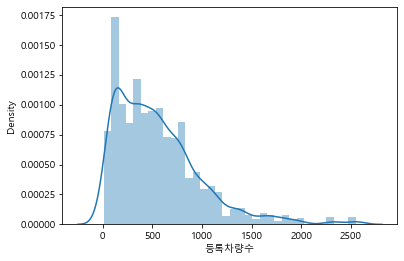

In [31]:
sns.distplot(train['등록차량수'])

In [32]:
print("왜도: ", train['등록차량수'].skew())
print("첨도: ", train['등록차량수'].kurt())

왜도:  1.461736237418257
첨도:  2.9769704789615394


- 수치형 변수와의 상관관계 분석

<AxesSubplot:>

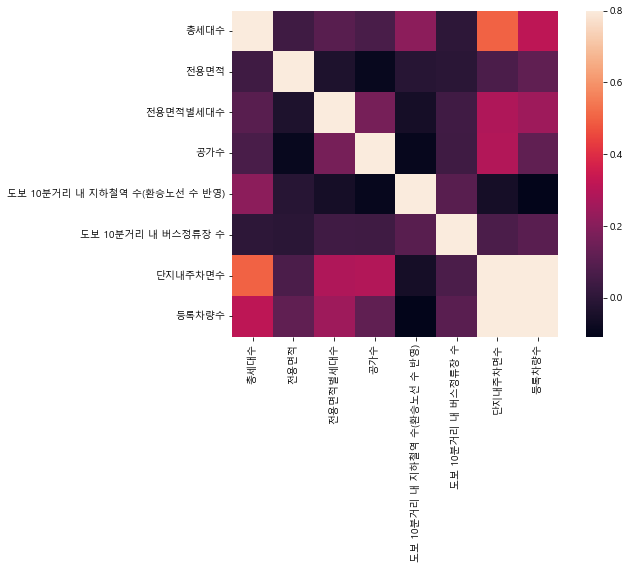

In [33]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corrmat, vmax=.8, square=True)

- 등록차량수는 단지내주차면수와 강한 양의상관관계를 보임

In [34]:
k = 4 #number of variables for heatmap
cols = corrmat.nlargest(k, '등록차량수')['등록차량수'].index
print(cols)


Index(['등록차량수', '단지내주차면수', '총세대수', '전용면적별세대수'], dtype='object')


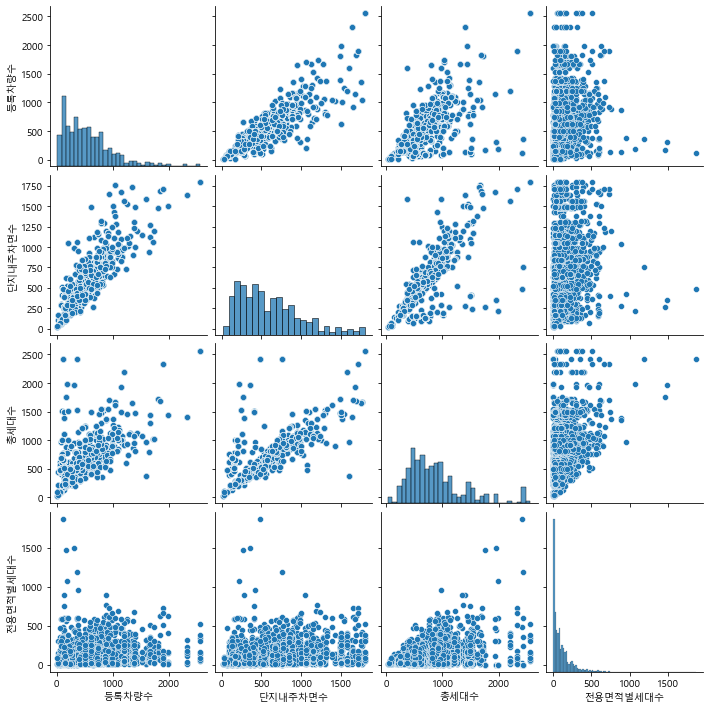

In [35]:
cols = ['등록차량수', '단지내주차면수', '총세대수', '전용면적별세대수']
sns.pairplot(train[cols], size = 2.5)
plt.show()

In [36]:
def data_preprocessing(train, test):
    
    error_data = ['C2085', 'C1397', 'C2431', 'C1649', 'C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']

    for error in error_data :
        train = train[train['단지코드'] != error]


    train = train[train.단지코드 != 'C1804']
    train = train[train.단지코드 != 'C2405']
    train = train[train.단지코드 != 'C1740']
    train = train[train.단지코드 != 'C1206']

    train.loc[train.임대보증금=='-', '임대보증금'] = np.nan
    test.loc[test.임대보증금=='-', '임대보증금'] = np.nan
    train['임대보증금'] = train['임대보증금'].astype(float)
    test['임대보증금'] = test['임대보증금'].astype(float)
    
    train['총세대수'] = train['총세대수'].astype(float)
    test['총세대수'] = test['총세대수'].astype(float)

    train.loc[train.임대료=='-', '임대료'] = np.nan
    test.loc[test.임대료=='-', '임대료'] = np.nan
    train['임대료'] = train['임대료'].astype(float)
    test['임대료'] = test['임대료'].astype(float)

    train[['임대보증금', '임대료']] = train[['임대보증금', '임대료']].fillna(0)
    test[['임대보증금', '임대료']] = test[['임대보증금', '임대료']].fillna(0)

    cols = ['도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']
    train[cols] = train[cols].fillna(0)
    test[cols] = test[cols].fillna(0)
    
    test.loc[test.단지코드.isin(['C2411']) & test.자격유형.isnull(), '자격유형'] = 'A'
    test.loc[test.단지코드.isin(['C2253']) & test.자격유형.isnull(), '자격유형'] = 'C'
    
    train = train.drop_duplicates()
    test = test.drop_duplicates()
    
    
    
    return train, test

In [37]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_money = pd.read_csv('train_final.csv')

In [38]:
train, test = data_preprocessing(train,test)

In [39]:
train.head(1)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
8,C2515,545.0,아파트,경상남도,국민임대,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0


In [40]:
train = train.reset_index(drop=True)
train = train.drop('단지코드',axis=1)

In [41]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [42]:
X = train.drop(columns = ['등록차량수'], axis=1)
y = train['등록차량수']

In [43]:
X.head(1)

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,임대건물구분_상가,...,자격유형_F,자격유형_G,자격유형_H,자격유형_I,자격유형_J,자격유형_K,자격유형_L,자격유형_M,자격유형_N,자격유형_O
0,545.0,33.48,276,17.0,9216000.0,82940.0,0.0,3.0,624.0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
X.columns

Index(['총세대수', '전용면적', '전용면적별세대수', '공가수', '임대보증금', '임대료',
       '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수', '단지내주차면수',
       '임대건물구분_상가', '임대건물구분_아파트', '지역_강원도', '지역_경기도', '지역_경상남도', '지역_경상북도',
       '지역_광주광역시', '지역_대구광역시', '지역_대전광역시', '지역_부산광역시', '지역_서울특별시',
       '지역_세종특별자치시', '지역_울산광역시', '지역_전라남도', '지역_전라북도', '지역_제주특별자치도', '지역_충청남도',
       '지역_충청북도', '공급유형_공공분양', '공급유형_공공임대(10년)', '공급유형_공공임대(50년)',
       '공급유형_공공임대(5년)', '공급유형_공공임대(분납)', '공급유형_국민임대', '공급유형_영구임대', '공급유형_임대상가',
       '공급유형_장기전세', '공급유형_행복주택', '자격유형_A', '자격유형_B', '자격유형_C', '자격유형_D',
       '자격유형_E', '자격유형_F', '자격유형_G', '자격유형_H', '자격유형_I', '자격유형_J', '자격유형_K',
       '자격유형_L', '자격유형_M', '자격유형_N', '자격유형_O'],
      dtype='object')

In [45]:
from sklearn.model_selection import KFold

def kfold_val(n, model, X_data, y_target,expm1):
    kfold = KFold(n_splits=n)
    cv_mae=[]

    n_iter = 0 

    for train_index, test_index in kfold.split(X_data):
        X_train, X_test = X_data.iloc[train_index], X_data.iloc[test_index]
        y_train, y_test = y_target[train_index], y_target[test_index]
        # 학습 및 예측
        

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        n_iter += 1

        if expm1 :
            y_t = np.expm1(y_test)
            y_p = np.expm1(y_pred)
        else:
            y_t = y_test
            y_p = y_pred

        a = 0
        mae = mean_absolute_error(y_t,y_p)
        train_size = X_train.shape[0]
        test_size = X_test.shape[0]
#         print('\n#{0} 교차 검증 MAE :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'.format(n_iter, mae, train_size, test_size))
        cv_mae.append(mae)
    # 개별 iteration별 정확도를 합하여 평균 정확도 계산
    print(model, '\n## 평균 검증 MAE:', np.mean(cv_mae))
    return np.mean(cv_mae)

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression


lr = LinearRegression()

In [20]:
kfold_val(5, lr, X, y,False)

LinearRegression() 
## 평균 검증 MAE: 188.33859669016482


188.33859669016482

In [21]:
def get_top_bottom_coef(model) :
    print(model.coef_)
    coef = pd.Series(model.coef_, index=X.columns)
    
    coef_high = coef.sort_values(ascending=False).head(10) # 회귀계수가 큰 10개
    coef_low = coef.sort_values(ascending=False).tail(10) # -로 표현된 회귀계수에서 절대값이 큰 10개
    
    return coef_high, coef_low

In [22]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__ +' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120) # 안쪽, 패딩값
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

In [23]:
models = [lr]
visualize_coefficient(models)

NameError: name 'lr' is not defined

- 지역 전처리 추가 후 점수비교

In [24]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_money = pd.read_csv('train_final.csv')
train, test = data_preprocessing(train,test)

In [27]:
region_regi_car

,등록차량수,총세대수,지역_세대당차량수
지역,,,
강원도,67349.0,82773.0,0.813659
경기도,468777.0,562547.0,0.833312
경상남도,138957.0,220033.0,0.631528
경상북도,63132.0,63649.0,0.991877
광주광역시,101046.0,107544.0,0.939578
대구광역시,86660.0,85374.0,1.015063
대전광역시,130757.0,246414.0,0.530639
부산광역시,83279.0,332481.0,0.250477
서울특별시,33630.0,38986.0,0.862617


In [26]:
region_regi_car = train.groupby(['지역'])['등록차량수','총세대수'].sum()
region_regi_car['지역_세대당차량수'] = region_regi_car['등록차량수'] / region_regi_car['총세대수']
region_mapping = region_regi_car.drop(['등록차량수','총세대수'],axis=1)
region_mapping

,지역_세대당차량수
지역,
강원도,0.813659
경기도,0.833312
경상남도,0.631528
경상북도,0.991877
광주광역시,0.939578
대구광역시,1.015063
대전광역시,0.530639
부산광역시,0.250477
서울특별시,0.862617


In [26]:
mapping_values = []
for r in train['지역'].values:
    mapping_values.extend([region_mapping.loc[r].values])
region_car = pd.DataFrame(mapping_values, columns = ['지역_세대당차량수'], index = train.index)
train = pd.concat([train,region_car], axis= 1).drop(columns = ['지역'])

mapping_values = []
for r in test['지역'].values:
    mapping_values.extend([region_mapping.loc[r].values])
region_car = pd.DataFrame(mapping_values, columns = ['지역_세대당차량수'], index = test.index)
test = pd.concat([test,region_car], axis= 1).drop(columns = ['지역'])

In [27]:
train.head()

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,지역_세대당차량수
8,C2515,545.0,아파트,국민임대,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0,0.631528
9,C2515,545.0,아파트,국민임대,39.60,60,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,0.631528
10,C2515,545.0,아파트,국민임대,39.60,20,17.0,A,12672000.0,107130.0,0.0,3.0,624.0,205.0,0.631528
11,C2515,545.0,아파트,국민임대,46.90,38,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0,0.631528
12,C2515,545.0,아파트,국민임대,46.90,19,17.0,A,18433000.0,149760.0,0.0,3.0,624.0,205.0,0.631528


In [28]:
train = train.reset_index(drop=True)
train = train.drop('단지코드',axis=1)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
X = train.drop(columns = ['등록차량수'], axis=1)
y = train['등록차량수']

In [29]:
lr = LinearRegression()
kfold_val(5, lr, X, y,False)

LinearRegression() 
## 평균 검증 MAE: 175.72457851336452


175.72457851336452

[ 3.59051206e-02  8.82754936e-03  5.93664174e-02 -1.75460387e+00
  1.06191197e-07  7.49327401e-05 -2.11981665e+01  4.74148342e+00
  7.40803279e-01  2.17974992e+02 -1.91722936e+02  1.91722936e+02
  5.13479357e+02  1.81191020e+02 -1.84610893e+02  1.02318154e-12
  2.53522714e+02 -1.40380491e+02 -2.73036790e+02 -1.91722936e+02
 -1.58441980e+02  1.30739863e-12 -3.21304879e-01 -3.49273538e+01
  7.92206205e+00  3.21756421e+02 -1.09941267e+01 -1.91442973e+02
 -3.05052012e+02  4.98579716e+01  1.63201316e+02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00]


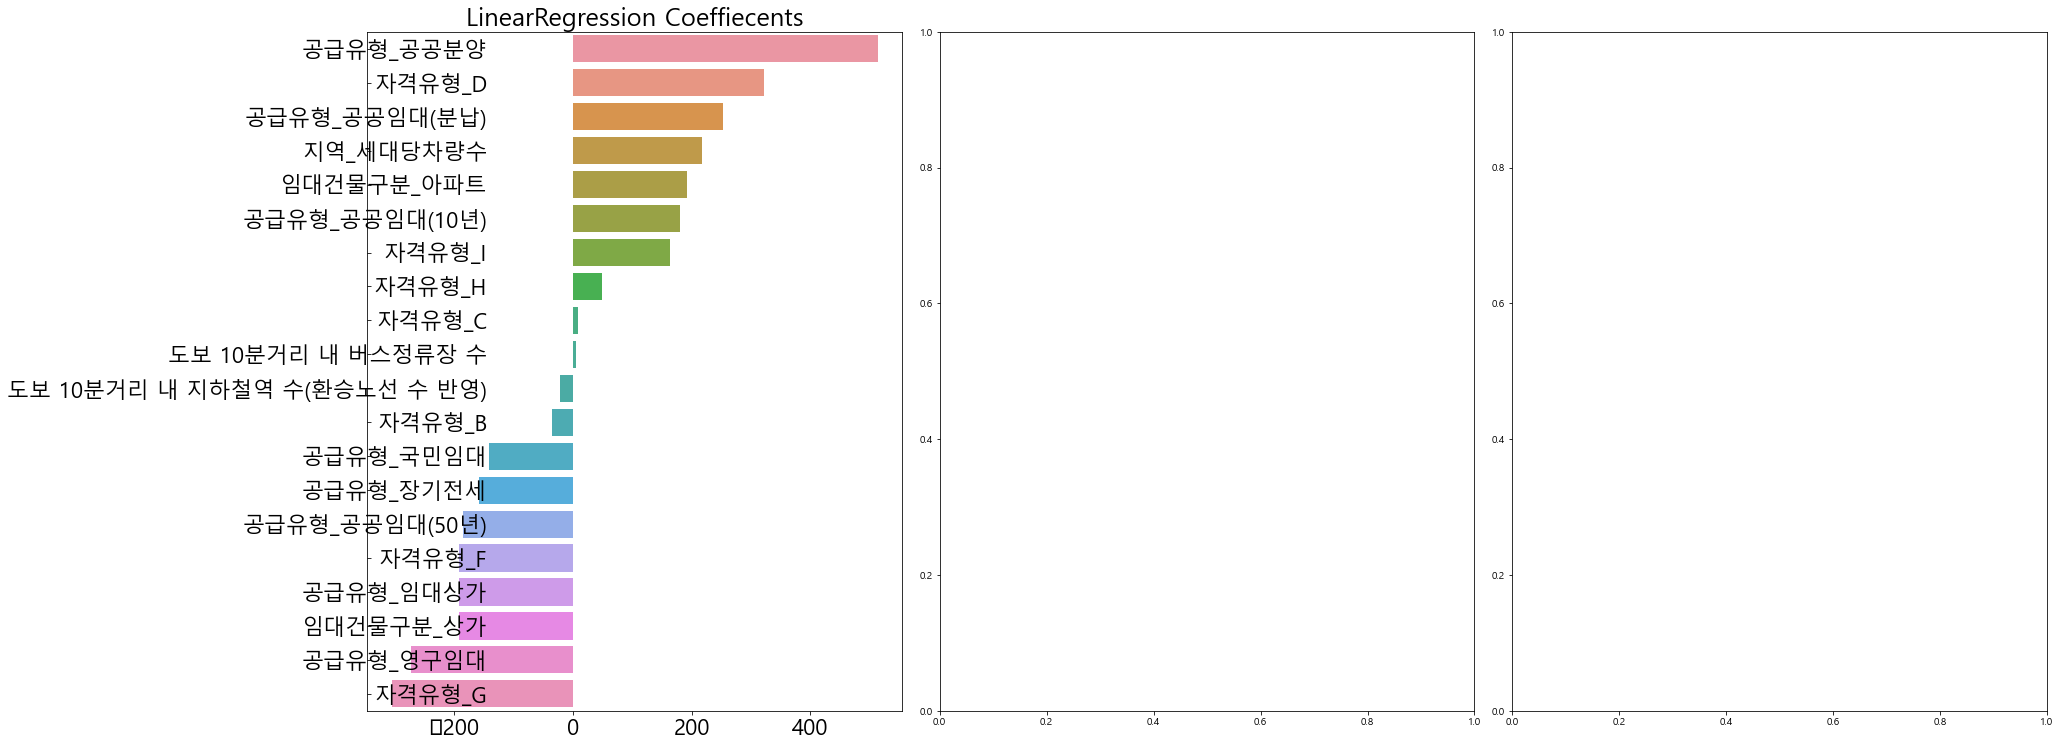

In [30]:
models = [lr]
visualize_coefficient(models)

- 자격유형, 공급유형 전처리 추가 후 점수비교

In [31]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_money = pd.read_csv('train_final.csv')
train, test = data_preprocessing(train,test)

In [32]:
train.loc[train.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
train.loc[train.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'
test.loc[test.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

train.loc[train.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'
test.loc[test.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'

train.loc[train.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
test.loc[test.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'

train.loc[train.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'
test.loc[test.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'


In [33]:
region_regi_car = train.groupby(['지역'])['등록차량수','총세대수'].sum()
region_regi_car['지역_세대당차량수'] = region_regi_car['등록차량수'] / region_regi_car['총세대수']
region_mapping = region_regi_car.drop(['등록차량수','총세대수'],axis=1)

mapping_values = []
for r in train['지역'].values:
    mapping_values.extend([region_mapping.loc[r].values])
region_car = pd.DataFrame(mapping_values, columns = ['지역_세대당차량수'], index = train.index)
train = pd.concat([train,region_car], axis= 1).drop(columns = ['지역'])

mapping_values = []
for r in test['지역'].values:
    mapping_values.extend([region_mapping.loc[r].values])
region_car = pd.DataFrame(mapping_values, columns = ['지역_세대당차량수'], index = test.index)
test = pd.concat([test,region_car], axis= 1).drop(columns = ['지역'])

In [34]:
train = train.reset_index(drop=True)
train = train.drop('단지코드',axis=1)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
X = train.drop(columns = ['등록차량수'], axis=1)
y = train['등록차량수']

In [35]:
X.head(1)

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,지역_세대당차량수,...,공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
0,545.0,33.48,276,17.0,9216000.0,82940.0,0.0,3.0,624.0,0.631528,...,0,1,0,0,0,1,0,0,0,0


In [36]:
lr = LinearRegression()
kfold_val(5, lr, X, y,False)

LinearRegression() 
## 평균 검증 MAE: 177.00238886757415


177.00238886757415

[ 1.59613274e-02  2.34724136e-02  3.38876808e-02 -1.84420763e+00
  3.13044418e-07  5.92869790e-05 -1.96404850e+01  4.36450542e+00
  7.64795011e-01  2.24194242e+02 -2.39905616e+02  2.39905616e+02
 -1.51406060e+01  3.41003014e+02  1.75055369e+01 -1.03462328e+02
 -2.39905616e+02  0.00000000e+00 -1.68686116e+02  4.76107453e+02
 -1.81933865e+02 -1.25487472e+02  0.00000000e+00]


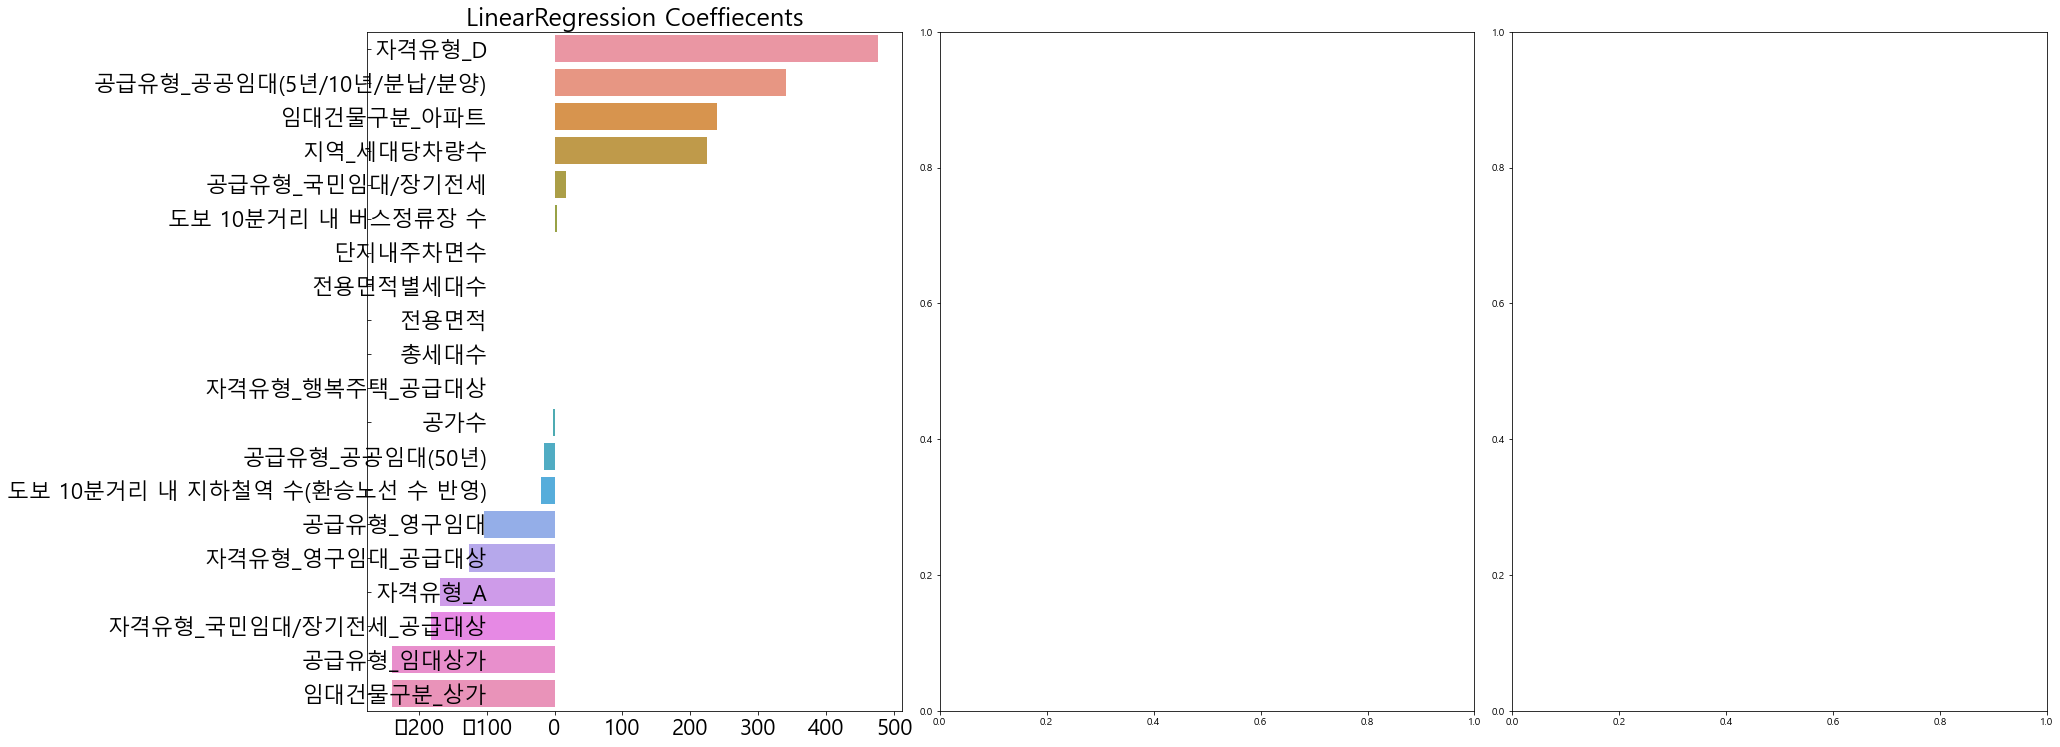

In [37]:
models = [lr]
visualize_coefficient(models)

- 로그 변환 후 점수 비교

In [38]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_money = pd.read_csv('train_final.csv')
train, test = data_preprocessing(train,test)

In [39]:
train = train.reset_index(drop=True)
train = train.drop('단지코드',axis=1)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

X = np.log1p(train.drop(columns = ['등록차량수'], axis=1))
# X = train.drop(columns=['등록차량수'], axis=1)
y = np.log1p(train['등록차량수'])

In [40]:
X.head(1)

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,임대건물구분_상가,...,자격유형_F,자격유형_G,자격유형_H,자격유형_I,자격유형_J,자격유형_K,자격유형_L,자격유형_M,자격유형_N,자격유형_O
0,6.302619,3.540379,5.624018,2.890372,16.036452,11.325885,0.0,1.386294,6.437752,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:

lr = LinearRegression()
kfold_val(5, lr, X, y,True)

LinearRegression() 
## 평균 검증 MAE: 176.66517673530046


176.66517673530046

- Standard Scaling 진행 후 비교

In [47]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_money = pd.read_csv('train_final.csv')
train, test = data_preprocessing(train,test)

train = train.reset_index(drop=True)
train = train.drop('단지코드',axis=1)

test = test.reset_index(drop=True)
test = test.drop('단지코드',axis=1)


In [48]:
X = train.drop(columns=['등록차량수'], axis=1)
numeric_feats = X.dtypes[X.dtypes != "object"].index

In [49]:
# X.loc[:, numeric_feats] = np.log1p(X[numeric_feats])
y = np.log1p(train['등록차량수'])

scaler = StandardScaler()
X.loc[:, numeric_feats] = scaler.fit_transform(X[numeric_feats])
test.loc[:, numeric_feats] = scaler.transform(test[numeric_feats])

X = pd.get_dummies(X)
test = pd.get_dummies(test)

In [50]:
X.head(1)

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,임대건물구분_상가,...,자격유형_F,자격유형_G,자격유형_H,자격유형_I,자격유형_J,자격유형_K,자격유형_L,자격유형_M,자격유형_N,자격유형_O
0,-0.634487,-0.370205,1.179519,0.350143,-0.670151,-0.639025,-0.373571,-0.254343,-0.011321,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:

lr = LinearRegression()
kfold_val(5, lr, X, y,True)

LinearRegression() 
## 평균 검증 MAE: 193.20924844775166


193.20924844775166

- 로그 + 지역 + 자격유형 + 공급유형

In [52]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_money = pd.read_csv('train_final.csv')
train, test = data_preprocessing(train,test)

In [53]:
train.loc[train.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
train.loc[train.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'
test.loc[test.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

train.loc[train.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'
test.loc[test.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'

train.loc[train.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
test.loc[test.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'

train.loc[train.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'
test.loc[test.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'


In [54]:
region_regi_car = train.groupby(['지역'])['등록차량수','총세대수'].sum()
region_regi_car['지역_세대당차량수'] = region_regi_car['등록차량수'] / region_regi_car['총세대수']
region_mapping = region_regi_car.drop(['등록차량수','총세대수'],axis=1)

mapping_values = []
for r in train['지역'].values:
    mapping_values.extend([region_mapping.loc[r].values])
region_car = pd.DataFrame(mapping_values, columns = ['지역_세대당차량수'], index = train.index)
train = pd.concat([train,region_car], axis= 1).drop(columns = ['지역'])

mapping_values = []
for r in test['지역'].values:
    mapping_values.extend([region_mapping.loc[r].values])
region_car = pd.DataFrame(mapping_values, columns = ['지역_세대당차량수'], index = test.index)
test = pd.concat([test,region_car], axis= 1).drop(columns = ['지역'])

In [55]:
train = train.reset_index(drop=True)
train = train.drop('단지코드',axis=1)

test = test.reset_index(drop=True)
test = test.drop('단지코드',axis=1)

train = pd.get_dummies(train)
test = pd.get_dummies(test)

X = np.log1p(train.drop(columns = ['등록차량수'], axis=1))
y = np.log1p(train['등록차량수'])


In [56]:
X.head(1)

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,지역_세대당차량수,...,공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
0,6.302619,3.540379,5.624018,2.890372,16.036452,11.325885,0.0,1.386294,6.437752,0.489517,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0


In [57]:

lr = LinearRegression()
kfold_val(5, lr, X, y,True)

LinearRegression() 
## 평균 검증 MAE: 172.79307366750237


172.79307366750237

[ 0.31210318 -0.03230597 -0.00347809 -0.01652784  0.11033986  0.03275151
 -0.12488738 -0.01280783  0.58828915  0.56108786 -0.51590024  0.51590024
  0.17174123  0.72277996  0.3713737  -0.74999465 -0.51590024  0.
 -1.00175236  2.8406635  -1.12515173 -0.71375942  0.        ]


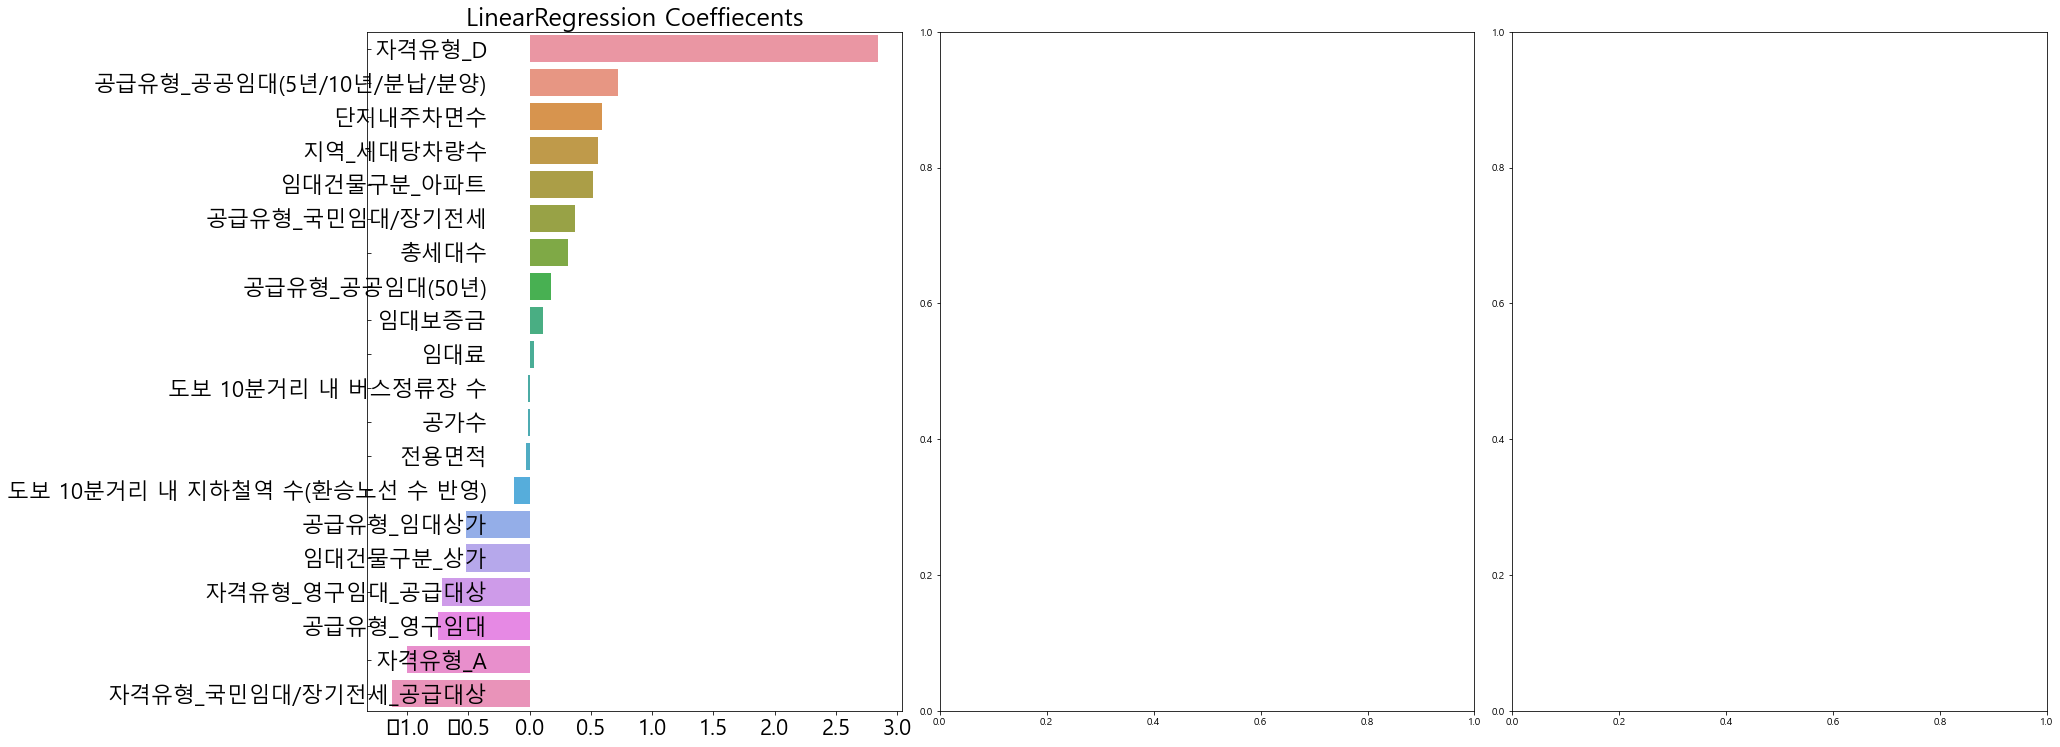

In [58]:
models = [lr]
visualize_coefficient(models)

In [59]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params,X_data, y_target):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_absolute_error', cv=10)
    grid_model.fit(X_data, y_target)
    mae = -1 *  grid_model.best_score_
    print('{0} 5 CV 시 최적 평균 로그 변환된 MAE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(mae, 4), grid_model.best_params_))
    return grid_model.best_estimator_

In [60]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
elastic_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_reg = ElasticNet()

best_ridge=get_best_params(ridge_reg,ridge_params,X,y)
best_lasso = get_best_params(lasso_reg,lasso_params,X,y)
best_elastic = get_best_params(elastic_reg,elastic_params,X,y)

# lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=best_ridge.alpha)
lasso_reg = Lasso(alpha=best_lasso.alpha)
elastic_reg = ElasticNet(alpha=best_elastic.alpha)

# 성능 평가
models = [ridge_reg, lasso_reg, elastic_reg]

for model in models:
    kfold_val(5, model, X, y,True)

Ridge 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2678, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2696, 최적 alpha:{'alpha': 0.001}
ElasticNet 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2689, 최적 alpha:{'alpha': 0.005}
Ridge(alpha=20) 
## 평균 검증 MAE: 147.2022194486903
Lasso(alpha=0.001) 
## 평균 검증 MAE: 146.743333539523
ElasticNet(alpha=0.005) 
## 평균 검증 MAE: 150.1301333241883


[ 0.17444573  0.05734373 -0.00293079 -0.01739584  0.01699083  0.01304159
 -0.10995132  0.01547788  0.71858157  0.30122964 -0.11657642  0.11657642
 -0.04061159  0.36737257  0.0629076  -0.27309215 -0.11657642  0.
  0.11398602  0.07433216  0.05227228 -0.24059045  0.        ]
[ 1.67809746e-01  2.55358717e-02 -0.00000000e+00 -1.69674924e-02
  1.55980048e-02  9.47042824e-03 -9.93110292e-02  4.69979616e-03
  7.31625011e-01  4.37683104e-01 -3.22434029e-01  9.34534072e-15
  0.00000000e+00  5.99247796e-01  1.21754533e-01 -5.88788600e-01
 -1.38177675e-02  0.00000000e+00  1.58750893e-02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00]
[ 4.89812078e-02  3.90820334e-02  7.62041653e-04 -1.21415776e-02
  2.54948453e-02  1.08413919e-02 -8.70457810e-02  2.60067763e-03
  8.27269064e-01  2.63892875e-01 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  3.24257889e-01  0.00000000e+00 -2.89685507e-01
 -0.00000000e+00  0.00000000e+00  3.07574039e-02  0.00000000e+00
 -0.00000000e+00 -1.6506895

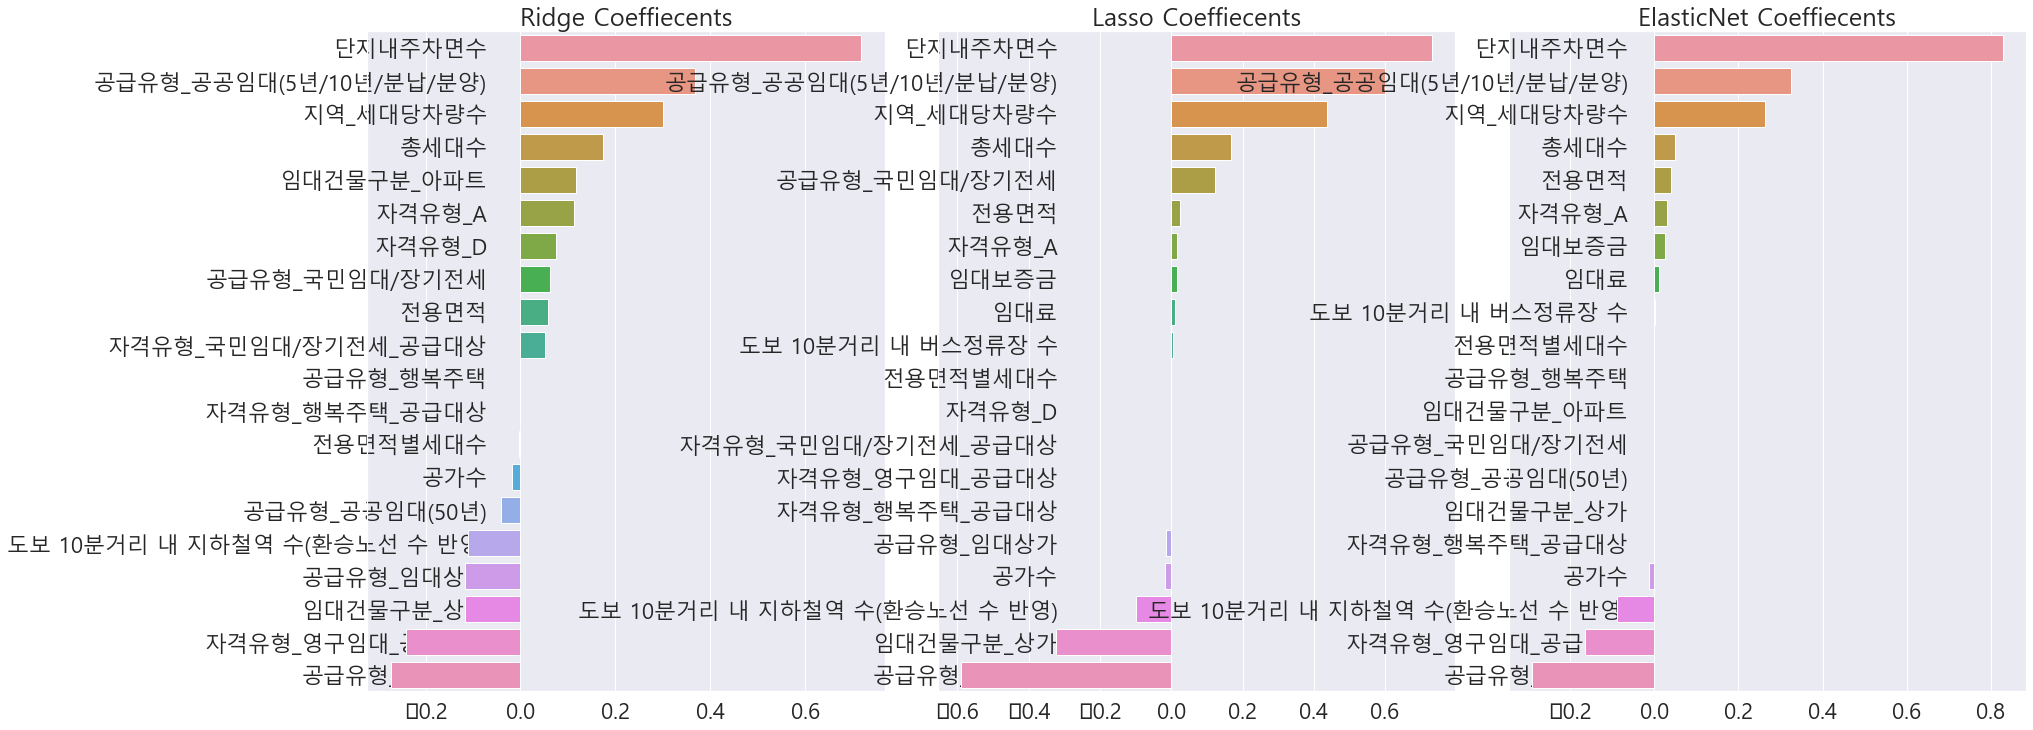

In [487]:
models = [ridge_reg, lasso_reg , elastic_reg]
visualize_coefficient(models)

<AxesSubplot:>

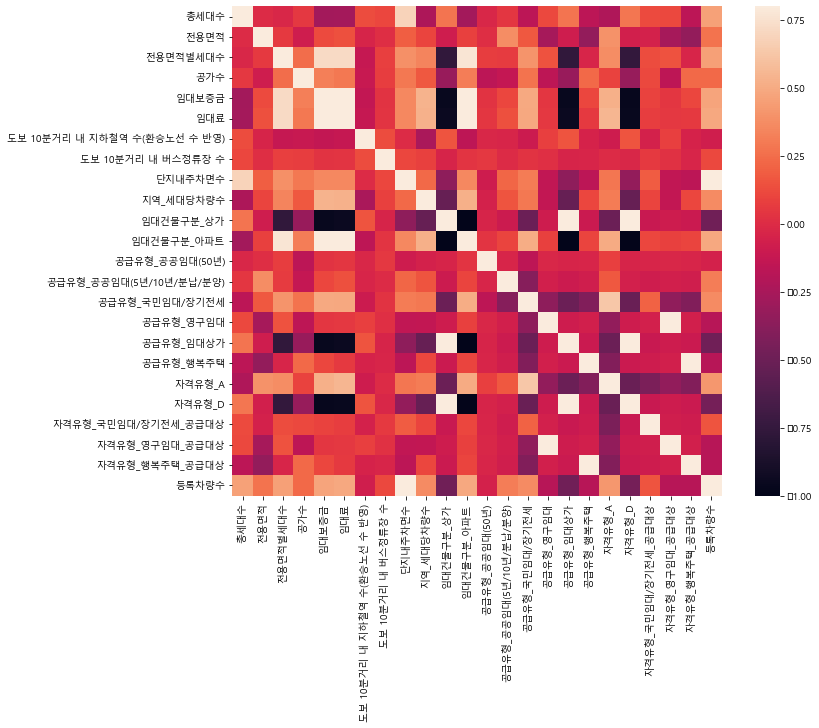

In [61]:
all_data = pd.concat([X,y], axis=1)
corrmat = all_data.corr()
f, ax = plt.subplots(figsize=(12, a))
sns.heatmap(corrmat, vmax=.8, square=True)

In [505]:
# corrmat['등록차량수']

In [62]:
corrmat1 = corrmat.iloc[:12].T
corrmat1[corrmat1 > 0.5].fillna(0).round(2)

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,지역_세대당차량수,임대건물구분_상가,임대건물구분_아파트
총세대수,1.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.68,0.00,0.00,0.00
전용면적,0.00,1.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
전용면적별세대수,0.00,0.0,1.00,0.0,0.72,0.72,0.0,0.0,0.00,0.00,0.00,0.77
공가수,0.00,0.0,0.00,1.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00
임대보증금,0.00,0.0,0.72,0.0,1.00,0.99,0.0,0.0,0.00,0.54,0.00,0.96
임대료,0.00,0.0,0.72,0.0,0.99,1.00,0.0,0.0,0.00,0.53,0.00,0.95
도보 10분거리 내 지하철역 수(환승노선 수 반영),0.00,0.0,0.00,0.0,0.00,0.00,1.0,0.0,0.00,0.00,0.00,0.00
도보 10분거리 내 버스정류장 수,0.00,0.0,0.00,0.0,0.00,0.00,0.0,1.0,0.00,0.00,0.00,0.00
단지내주차면수,0.68,0.0,0.00,0.0,0.00,0.00,0.0,0.0,1.00,0.00,0.00,0.00
지역_세대당차량수,0.00,0.0,0.00,0.0,0.54,0.53,0.0,0.0,0.00,1.00,0.00,0.52


In [63]:
corrmat2 = corrmat.iloc[12:].T
corrmat2[corrmat2 > 0.5].fillna(0).round(2)

,공급유형_공공임대(50년),공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상,등록차량수
총세대수,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00
전용면적,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00
전용면적별세대수,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00
공가수,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00
임대보증금,0.0,0.0,0.00,0.00,0.00,0.0,0.52,0.00,0.0,0.00,0.0,0.00
임대료,0.0,0.0,0.00,0.00,0.00,0.0,0.55,0.00,0.0,0.00,0.0,0.00
도보 10분거리 내 지하철역 수(환승노선 수 반영),0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00
도보 10분거리 내 버스정류장 수,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00
단지내주차면수,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.87
지역_세대당차량수,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00


In [64]:
corrmat['등록차량수'].to_frame().sort_values(by='등록차량수',ascending=False)

,등록차량수
등록차량수,1.000000
단지내주차면수,0.872788
임대료,0.485998
임대건물구분_아파트,0.484831
임대보증금,0.476555
총세대수,0.457009
전용면적별세대수,0.454422
자격유형_A,0.414276
지역_세대당차량수,0.368910
공급유형_국민임대/장기전세,0.366759


 - 다중공선성 고려 : 총세대수, 임대보증금, 자격유형_D, 공급유형_영구임대
- 네가지 날려보기

In [65]:
X.head(1)

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,지역_세대당차량수,...,공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
0,6.302619,3.540379,5.624018,2.890372,16.036452,11.325885,0.0,1.386294,6.437752,0.489517,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0


In [66]:
X = X.drop(['총세대수', '임대보증금', '자격유형_D', '공급유형_영구임대'], axis=1)

In [67]:
X.shape

(2540, 19)

In [68]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
elastic_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_reg = ElasticNet()

best_ridge=get_best_params(ridge_reg,ridge_params,X,y)
best_lasso = get_best_params(lasso_reg,lasso_params,X,y)
best_elastic = get_best_params(elastic_reg,elastic_params,X,y)

# lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=best_ridge.alpha)
lasso_reg = Lasso(alpha=best_lasso.alpha)
elastic_reg = ElasticNet(alpha=best_elastic.alpha)

# 성능 평가
models = [ridge_reg, lasso_reg, elastic_reg]

for model in models:
    kfold_val(5, model, X, y,True)

Ridge 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2671, 최적 alpha:{'alpha': 15}
Lasso 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2687, 최적 alpha:{'alpha': 0.001}
ElasticNet 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2679, 최적 alpha:{'alpha': 0.005}
Ridge(alpha=15) 
## 평균 검증 MAE: 141.42885117740875
Lasso(alpha=0.001) 
## 평균 검증 MAE: 141.94972641490767
ElasticNet(alpha=0.005) 
## 평균 검증 MAE: 145.43005050092373


[ 0.05991269  0.00223116 -0.01566347  0.01588727 -0.10194262  0.01730625
  0.85708181  0.28948787 -0.09899672  0.09899672  0.01188204  0.37135238
  0.06228069 -0.09899672  0.          0.12539801  0.08227934 -0.29609084
  0.        ]
[ 3.39705567e-02  4.73303635e-03 -1.46464582e-02  2.26801259e-02
 -9.57961092e-02  8.07493898e-03  8.66115906e-01  3.78254800e-01
 -2.34673334e-01  5.89551409e-16  0.00000000e+00  4.85675900e-01
  6.46400413e-02 -0.00000000e+00  0.00000000e+00  1.41028071e-02
 -0.00000000e+00 -4.31535548e-01  0.00000000e+00]
[ 0.04781083  0.00395749 -0.00827464  0.03848112 -0.08863855  0.00273696
  0.86878528  0.27158982 -0.          0.         -0.          0.29355542
  0.00418015 -0.          0.          0.04655728  0.         -0.35902861
  0.        ]


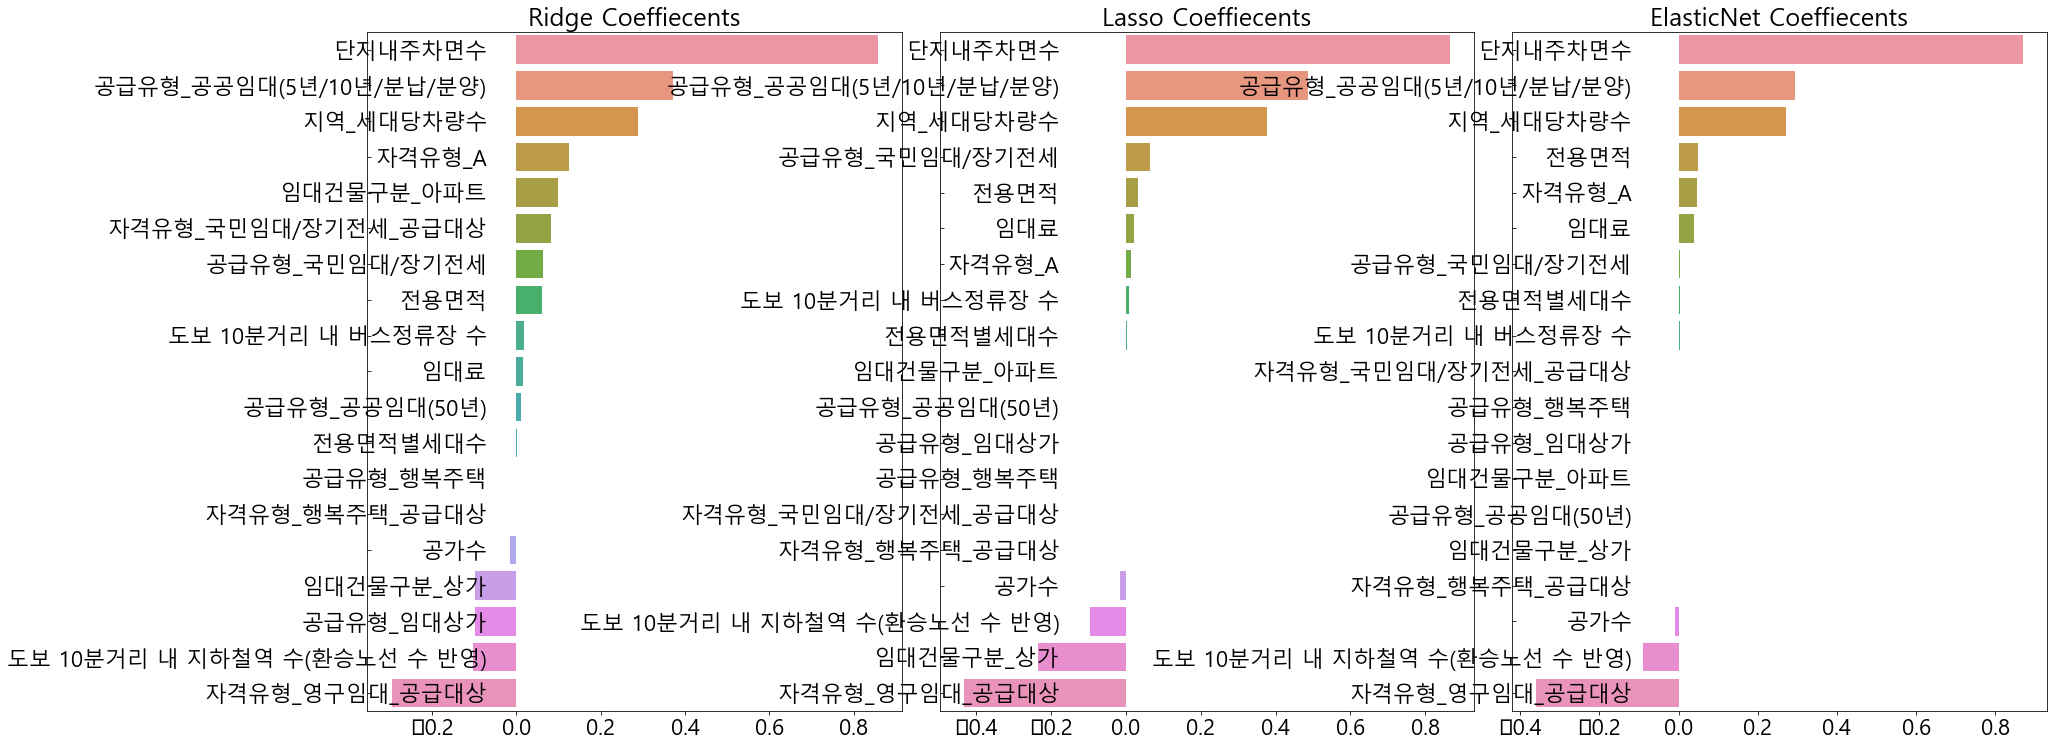

In [69]:
models = [ridge_reg, lasso_reg , elastic_reg]
visualize_coefficient(models)

In [70]:
from sklearn.preprocessing import PolynomialFeatures
poly_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
poly_X = pd.DataFrame(poly_X)

In [71]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
elastic_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_reg = ElasticNet()

best_ridge=get_best_params(ridge_reg,ridge_params,poly_X,y)
best_lasso = get_best_params(lasso_reg,lasso_params,poly_X,y)
best_elastic = get_best_params(elastic_reg,elastic_params,poly_X,y)

# lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=best_ridge.alpha)
lasso_reg = Lasso(alpha=best_lasso.alpha)
elastic_reg = ElasticNet(alpha=best_elastic.alpha)

# 성능 평가
models = [ridge_reg, lasso_reg, elastic_reg]

for model in models:
    kfold_val(5, model, poly_X, y,True)

Ridge 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2805, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2752, 최적 alpha:{'alpha': 0.03}
ElasticNet 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2752, 최적 alpha:{'alpha': 0.05}
Ridge(alpha=20) 
## 평균 검증 MAE: 134.90635375438455
Lasso(alpha=0.03) 
## 평균 검증 MAE: 144.9298785487806
ElasticNet(alpha=0.05) 
## 평균 검증 MAE: 143.43522204223797


- 면적 전처리 해보기

In [72]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_money = pd.read_csv('train_final.csv')
train, test = data_preprocessing(train,test)

In [73]:
train.loc[train.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
train.loc[train.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'
test.loc[test.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

train.loc[train.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'
test.loc[test.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'

train.loc[train.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
test.loc[test.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'

train.loc[train.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'
test.loc[test.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'


In [74]:
region_regi_car = train.groupby(['지역'])['등록차량수','총세대수'].sum()
region_regi_car['지역_세대당차량수'] = region_regi_car['등록차량수'] / region_regi_car['총세대수']
region_mapping = region_regi_car.drop(['등록차량수','총세대수'],axis=1)

mapping_values = []
for r in train['지역'].values:
    mapping_values.extend([region_mapping.loc[r].values])
region_car = pd.DataFrame(mapping_values, columns = ['지역_세대당차량수'], index = train.index)
train = pd.concat([train,region_car], axis= 1).drop(columns = ['지역'])

mapping_values = []
for r in test['지역'].values:
    mapping_values.extend([region_mapping.loc[r].values])
region_car = pd.DataFrame(mapping_values, columns = ['지역_세대당차량수'], index = test.index)
test = pd.concat([test,region_car], axis= 1).drop(columns = ['지역'])

In [75]:
# train['면적기준미만'] = np.where(train['전용면적']<50,1,0)
# train['면적기준이상'] = np.where(train['전용면적']>=50,1,0)
# test['면적기준미만'] = np.where(test['전용면적']<50,1,0)
# test['면적기준이상'] = np.where(test['전용면적']>=50,1,0)

In [76]:

train = train.reset_index(drop=True)
train = train.drop('단지코드',axis=1)

test = test.reset_index(drop=True)
test_code = test['단지코드']
test = test.drop('단지코드',axis=1)

train = pd.get_dummies(train)
test = pd.get_dummies(test)

X = np.log1p(train.drop(columns = ['등록차량수'], axis=1))
y = np.log1p(train['등록차량수'])
test = np.log1p(test)


# scaler = StandardScaler()
# X.loc[:, X.columns] = scaler.fit_transform(X)
# # test.loc[:, numeric_feats] = scaler.transform(test[numeric_feats])

X.head()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,지역_세대당차량수,...,공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
0,6.302619,3.540379,5.624018,2.890372,16.036452,11.325885,0.0,1.386294,6.437752,0.489517,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0
1,6.302619,3.703768,4.110874,2.890372,16.354905,11.581808,0.0,1.386294,6.437752,0.489517,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0
2,6.302619,3.703768,3.044522,2.890372,16.354905,11.581808,0.0,1.386294,6.437752,0.489517,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0
3,6.302619,3.869116,3.663562,2.890372,16.729653,11.916796,0.0,1.386294,6.437752,0.489517,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0
4,6.302619,3.869116,2.995732,2.890372,16.729653,11.916796,0.0,1.386294,6.437752,0.489517,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0


In [77]:
X = X.drop(['총세대수', '임대보증금', '자격유형_D', '공급유형_영구임대'], axis=1)
test = test.drop(['총세대수', '임대보증금', '자격유형_D', '공급유형_영구임대'], axis=1)

In [78]:
X.shape

(2540, 19)

In [79]:
test.shape

(949, 19)

In [80]:
poly_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
poly_X = pd.DataFrame(poly_X)

poly_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(test)
poly_test = pd.DataFrame(poly_test)

In [81]:
poly_X.shape

(2540, 209)

In [82]:
poly_test.shape

(949, 209)

In [83]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
elastic_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_reg = ElasticNet()

best_ridge=get_best_params(ridge_reg,ridge_params,X,y)
best_lasso = get_best_params(lasso_reg,lasso_params,X,y)
best_elastic = get_best_params(elastic_reg,elastic_params,X,y)

# lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=best_ridge.alpha)
lasso_reg = Lasso(alpha=best_lasso.alpha)
elastic_reg = ElasticNet(alpha=best_elastic.alpha)

# 성능 평가
models = [ridge_reg, lasso_reg, elastic_reg]

for model in models:
    kfold_val(5, model, X, y,True)

Ridge 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2671, 최적 alpha:{'alpha': 15}
Lasso 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2687, 최적 alpha:{'alpha': 0.001}
ElasticNet 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2679, 최적 alpha:{'alpha': 0.005}
Ridge(alpha=15) 
## 평균 검증 MAE: 141.42885117740875
Lasso(alpha=0.001) 
## 평균 검증 MAE: 141.94972641490767
ElasticNet(alpha=0.005) 
## 평균 검증 MAE: 145.43005050092373


In [84]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
elastic_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_reg = ElasticNet()

best_ridge=get_best_params(ridge_reg,ridge_params,poly_X,y)
best_lasso = get_best_params(lasso_reg,lasso_params,poly_X,y)
best_elastic = get_best_params(elastic_reg,elastic_params,poly_X,y)

# lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=best_ridge.alpha)
lasso_reg = Lasso(alpha=best_lasso.alpha)
elastic_reg = ElasticNet(alpha=best_elastic.alpha)

# 성능 평가
models = [ridge_reg, lasso_reg, elastic_reg]

for model in models:
    kfold_val(5, model, poly_X, y,True)

Ridge 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2805, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2752, 최적 alpha:{'alpha': 0.03}
ElasticNet 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2752, 최적 alpha:{'alpha': 0.05}
Ridge(alpha=20) 
## 평균 검증 MAE: 134.90635375438455
Lasso(alpha=0.03) 
## 평균 검증 MAE: 144.9298785487806
ElasticNet(alpha=0.05) 
## 평균 검증 MAE: 143.43522204223797


In [646]:
X_test.drop('num',axis=1,inplace=True)

In [647]:

ridge_pred = ridge_reg.predict(poly_test)
final_pred = np.expm1(ridge_pred)
X_test['num'] = final_pred

In [648]:
X_test.head()

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,지역_세대당차량수,num
0,C1072,754,아파트,국민임대,39.79,116,14.0,H,22830000.0,189840.0,0.0,2.0,683.0,0.833312,638.244751
1,C1072,754,아파트,국민임대,46.81,30,14.0,A,36048000.0,249930.0,0.0,2.0,683.0,0.833312,678.480891
2,C1072,754,아파트,국민임대,46.90,112,14.0,H,36048000.0,249930.0,0.0,2.0,683.0,0.833312,663.017399
3,C1072,754,아파트,국민임대,46.90,120,14.0,H,36048000.0,249930.0,0.0,2.0,683.0,0.833312,661.248831
4,C1072,754,아파트,국민임대,51.46,60,14.0,H,43497000.0,296780.0,0.0,2.0,683.0,0.833312,687.721550


In [649]:
submission = pd.DataFrame(data=X_test['num'], index=X_test.index)
submission.reset_index(inplace=True)
submission.columns=['code','num']
submission.loc[:,'code'] = test_code
submission.to_csv('submission_1002_1.csv',index=False)

(2540, 19)

## 민지 임대료
## 대환님 공가수

In [272]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train_money = pd.read_csv('train_final.csv')
train, test = data_preprocessing(train,test)

In [273]:
train.loc[train.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
train.loc[train.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'
test.loc[test.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

train.loc[train.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'
test.loc[test.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'

train.loc[train.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
test.loc[test.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'

train.loc[train.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'
test.loc[test.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'


In [274]:
# train['실거주수'] = train['총세대수'] - train['공가수']
# train['실거주율'] = train['실거주수'] / train['총세대수'] * 100

# test['실거주수'] = test['총세대수'] - test['공가수']
# test['실거주율'] = test['실거주수'] / test['총세대수'] * 100

In [275]:
# train['면적기준미만'] = np.where(train['전용면적']<50,1,0)
# train['면적기준이상'] = np.where(train['전용면적']>=50,1,0)
# test['면적기준미만'] = np.where(test['전용면적']<50,1,0)
# test['면적기준이상'] = np.where(test['전용면적']>=50,1,0)

In [276]:
region_regi_car = train.groupby(['지역'])['등록차량수','총세대수'].sum()
region_regi_car['지역_세대당차량수'] = region_regi_car['등록차량수'] / region_regi_car['총세대수']
region_mapping = region_regi_car.drop(['등록차량수','총세대수'],axis=1)

mapping_values = []
for r in train['지역'].values:
    mapping_values.extend([region_mapping.loc[r].values])
region_car = pd.DataFrame(mapping_values, columns = ['지역_세대당차량수'], index = train.index)
train = pd.concat([train,region_car], axis= 1).drop(columns = ['지역'])

mapping_values = []
for r in test['지역'].values:
    mapping_values.extend([region_mapping.loc[r].values])
region_car = pd.DataFrame(mapping_values, columns = ['지역_세대당차량수'], index = test.index)
test = pd.concat([test,region_car], axis= 1).drop(columns = ['지역'])

In [277]:
train.head(1)

,단지코드,총세대수,임대건물구분,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수,지역_세대당차량수
8,C2515,545.0,아파트,국민임대/장기전세,33.48,276,17.0,A,9216000.0,82940.0,0.0,3.0,624.0,205.0,0.631528


In [278]:

train = train.reset_index(drop=True)
train = train.drop('단지코드',axis=1)

test = test.reset_index(drop=True)
test_code = test['단지코드']
test = test.drop('단지코드',axis=1)

train = pd.get_dummies(train)
test = pd.get_dummies(test)

X = np.log1p(train.drop(columns = ['등록차량수'], axis=1))
y = np.log1p(train['등록차량수'])
test = np.log1p(test)


# scaler = StandardScaler()
# X.loc[:, X.columns] = scaler.fit_transform(X)
# # test.loc[:, numeric_feats] = scaler.transform(test[numeric_feats])

X.head()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,지역_세대당차량수,...,공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
0,6.302619,3.540379,5.624018,2.890372,16.036452,11.325885,0.0,1.386294,6.437752,0.489517,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0
1,6.302619,3.703768,4.110874,2.890372,16.354905,11.581808,0.0,1.386294,6.437752,0.489517,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0
2,6.302619,3.703768,3.044522,2.890372,16.354905,11.581808,0.0,1.386294,6.437752,0.489517,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0
3,6.302619,3.869116,3.663562,2.890372,16.729653,11.916796,0.0,1.386294,6.437752,0.489517,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0
4,6.302619,3.869116,2.995732,2.890372,16.729653,11.916796,0.0,1.386294,6.437752,0.489517,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0


In [279]:
# X = X.drop(['총세대수', '임대보증금', '자격유형_D', '공급유형_영구임대','실거주수','공가수'], axis=1)
# test = test.drop(['총세대수', '임대보증금', '자격유형_D', '공급유형_영구임대','실거주수','공가수'], axis=1)

In [280]:
X = X.drop(['총세대수', '임대보증금', '자격유형_D', '공급유형_영구임대'], axis=1)
test = test.drop(['총세대수', '임대보증금', '자격유형_D', '공급유형_영구임대'], axis=1)

In [281]:
X.columns

Index(['전용면적', '전용면적별세대수', '공가수', '임대료', '도보 10분거리 내 지하철역 수(환승노선 수 반영)',
       '도보 10분거리 내 버스정류장 수', '단지내주차면수', '지역_세대당차량수', '임대건물구분_상가', '임대건물구분_아파트',
       '공급유형_공공임대(50년)', '공급유형_공공임대(5년/10년/분납/분양)', '공급유형_국민임대/장기전세',
       '공급유형_임대상가', '공급유형_행복주택', '자격유형_A', '자격유형_국민임대/장기전세_공급대상',
       '자격유형_영구임대_공급대상', '자격유형_행복주택_공급대상'],
      dtype='object')

In [282]:
poly_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
poly_X = pd.DataFrame(poly_X)

poly_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(test)
poly_test = pd.DataFrame(poly_test)

In [283]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
elastic_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_reg = ElasticNet()

best_ridge=get_best_params(ridge_reg,ridge_params,poly_X,y)
best_lasso = get_best_params(lasso_reg,lasso_params,poly_X,y)
best_elastic = get_best_params(elastic_reg,elastic_params,poly_X,y)

# lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=best_ridge.alpha)
lasso_reg = Lasso(alpha=best_lasso.alpha)
elastic_reg = ElasticNet(alpha=best_elastic.alpha)

# 성능 평가
models = [ridge_reg, lasso_reg, elastic_reg]

for model in models:
    kfold_val(5, model, poly_X, y,True)

Ridge 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2805, 최적 alpha:{'alpha': 20}
Lasso 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2752, 최적 alpha:{'alpha': 0.03}
ElasticNet 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2752, 최적 alpha:{'alpha': 0.05}
Ridge(alpha=20) 
## 평균 검증 MAE: 134.90635375438455
Lasso(alpha=0.03) 
## 평균 검증 MAE: 144.9298785487806
ElasticNet(alpha=0.05) 
## 평균 검증 MAE: 143.43522204223797


<AxesSubplot:>

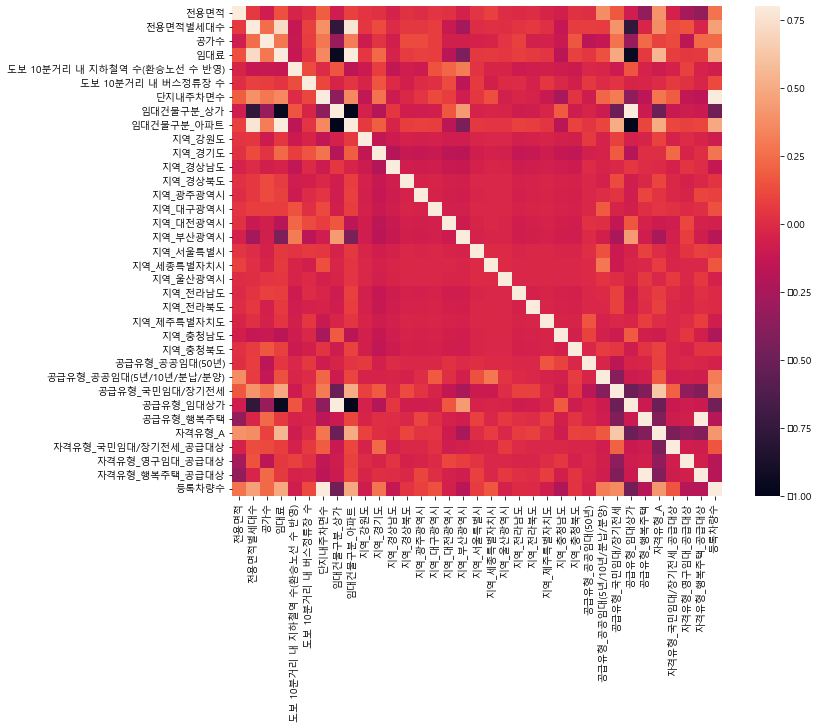

In [228]:
all_data = pd.concat([X,y], axis=1)
corrmat = all_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [229]:
corrmat['등록차량수'].to_frame().sort_values(by='등록차량수',ascending=False)

,등록차량수
등록차량수,1.000000
단지내주차면수,0.872788
임대료,0.485998
임대건물구분_아파트,0.484831
전용면적별세대수,0.454422
자격유형_A,0.414276
공급유형_국민임대/장기전세,0.366759
공급유형_공공임대(5년/10년/분납/분양),0.311523
지역_경기도,0.277582
전용면적,0.271510


- 임대료 채워서 다시 해보기

In [308]:
def data_preprocessing2(train, test):
    
    error_data = ['C2085', 'C1397', 'C2431', 'C1649', 'C1095', 'C2051', 'C1218', 'C1894', 'C2483', 'C1502', 'C1988']

    for error in error_data :
        train = train[train['단지코드'] != error]


    train = train[train.단지코드 != 'C1804']
    train = train[train.단지코드 != 'C2405']
    train = train[train.단지코드 != 'C1740']
    train = train[train.단지코드 != 'C1206']

    
    train['총세대수'] = train['총세대수'].astype(float)
    test['총세대수'] = test['총세대수'].astype(float)


    cols = ['도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']
    train[cols] = train[cols].fillna(0)
    test[cols] = test[cols].fillna(0)
    
    test.loc[test.단지코드.isin(['C2411']) & test.자격유형.isnull(), '자격유형'] = 'A'
    test.loc[test.단지코드.isin(['C2253']) & test.자격유형.isnull(), '자격유형'] = 'C'
    
    train = train.drop_duplicates()
    test = test.drop_duplicates()
    
    
    return train, test

In [350]:
train = pd.read_csv('train_final.csv',index_col ='단지코드')
train.drop(['Unnamed: 0'],inplace=True,axis=1)
train = train.reset_index()

test = pd.read_csv('test_final.csv',index_col ='단지코드')
test.drop(['Unnamed: 0.1','Unnamed: 0'],inplace=True,axis=1)
test = test.reset_index()

train, test = data_preprocessing2(train,test)

In [351]:
train.shape, test.shape

((2387, 15), (949, 14))

In [352]:
test.head(1)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수
0,C1072,754.0,아파트,경기도,국민임대,39.79,116,14.0,H,22830000.0,189840.0,0.0,2.0,683.0


In [353]:
train.loc[train.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
test.loc[test.공급유형.isin(['공공임대(5년)', '공공분양', '공공임대(10년)', '공공임대(분납)']), '공급유형'] = '공공임대(5년/10년/분납/분양)'
train.loc[train.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'
test.loc[test.공급유형.isin(['장기전세', '국민임대']), '공급유형'] = '국민임대/장기전세'

train.loc[train.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'
test.loc[test.자격유형.isin(['J', 'L', 'K', 'N', 'M', 'O']), '자격유형'] = '행복주택_공급대상'

train.loc[train.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'
test.loc[test.자격유형.isin(['H', 'B', 'E', 'G']), '자격유형'] = '국민임대/장기전세_공급대상'

train.loc[train.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'
test.loc[test.자격유형.isin(['C', 'I', 'F']), '자격유형'] = '영구임대_공급대상'


In [354]:
region_regi_car = train.groupby(['지역'])['등록차량수','총세대수'].sum()
region_regi_car['지역_세대당차량수'] = region_regi_car['등록차량수'] / region_regi_car['총세대수']
region_mapping = region_regi_car.drop(['등록차량수','총세대수'],axis=1)

mapping_values = []
for r in train['지역'].values:
    mapping_values.extend([region_mapping.loc[r].values])
region_car = pd.DataFrame(mapping_values, columns = ['지역_세대당차량수'], index = train.index)
train = pd.concat([train,region_car], axis= 1).drop(columns = ['지역'])

mapping_values = []
for r in test['지역'].values:
    mapping_values.extend([region_mapping.loc[r].values])
region_car = pd.DataFrame(mapping_values, columns = ['지역_세대당차량수'], index = test.index)
test = pd.concat([test,region_car], axis= 1).drop(columns = ['지역'])

In [355]:

train = train.reset_index(drop=True)
train = train.drop('단지코드',axis=1)

test = test.reset_index(drop=True)
test_code = test['단지코드']
test = test.drop('단지코드',axis=1)

train = pd.get_dummies(train)
test = pd.get_dummies(test)

X = np.log1p(train.drop(columns = ['등록차량수'], axis=1))
y = np.log1p(train['등록차량수'])
test = np.log1p(test)


# scaler = StandardScaler()
# X.loc[:, X.columns] = scaler.fit_transform(X)
# # test.loc[:, numeric_feats] = scaler.transform(test[numeric_feats])

X.head()

,총세대수,전용면적,전용면적별세대수,공가수,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,지역_세대당차량수,...,공급유형_공공임대(5년/10년/분납/분양),공급유형_국민임대/장기전세,공급유형_영구임대,공급유형_임대상가,공급유형_행복주택,자격유형_A,자격유형_D,자격유형_국민임대/장기전세_공급대상,자격유형_영구임대_공급대상,자격유형_행복주택_공급대상
0,6.302619,3.540379,5.624018,2.890372,16.036452,11.325885,0.0,1.386294,6.437752,0.50155,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0
1,6.302619,3.703768,4.110874,2.890372,16.354905,11.581808,0.0,1.386294,6.437752,0.50155,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0
2,6.302619,3.703768,3.044522,2.890372,16.354905,11.581808,0.0,1.386294,6.437752,0.50155,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0
3,6.302619,3.869116,3.663562,2.890372,16.729653,11.916796,0.0,1.386294,6.437752,0.50155,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0
4,6.302619,3.869116,2.995732,2.890372,16.729653,11.916796,0.0,1.386294,6.437752,0.50155,...,0.0,0.693359,0.0,0.0,0.0,0.693359,0.0,0.0,0.0,0.0


In [356]:
X = X.drop(['총세대수', '임대보증금', '자격유형_D', '공급유형_영구임대'], axis=1)
test = test.drop(['총세대수', '임대보증금', '자격유형_D', '공급유형_영구임대'], axis=1)

In [357]:
poly_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
poly_X = pd.DataFrame(poly_X)

poly_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(test)
poly_test = pd.DataFrame(poly_test)

In [358]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge_params = {'alpha' : [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}
elastic_params = {'alpha' : [0.001,0.005, 0.008,0.05, 0.03, 0.1, 0.5, 1.5,10]}

ridge_reg = Ridge()
lasso_reg = Lasso()
elastic_reg = ElasticNet()

best_ridge=get_best_params(ridge_reg,ridge_params,poly_X,y)
best_lasso = get_best_params(lasso_reg,lasso_params,poly_X,y)
best_elastic = get_best_params(elastic_reg,elastic_params,poly_X,y)

# lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=best_ridge.alpha)
lasso_reg = Lasso(alpha=best_lasso.alpha)
elastic_reg = ElasticNet(alpha=best_elastic.alpha)

# 성능 평가
models = [ridge_reg, lasso_reg, elastic_reg]

for model in models:
    kfold_val(5, model, poly_X, y,True)

Ridge 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2743, 최적 alpha:{'alpha': 0.05}
Lasso 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2645, 최적 alpha:{'alpha': 0.03}
ElasticNet 5 CV 시 최적 평균 로그 변환된 MAE 값: 0.2627, 최적 alpha:{'alpha': 0.03}
Ridge(alpha=0.05) 
## 평균 검증 MAE: 307.2959219507121
Lasso(alpha=0.03) 
## 평균 검증 MAE: 151.08826684457244
ElasticNet(alpha=0.03) 
## 평균 검증 MAE: 144.44528569301914


In [342]:
test.drop('num',axis=1,inplace=True)

In [343]:
lasso_pred = lasso_reg.predict(poly_test)
final_pred = np.expm1(lasso_pred)
test['num'] = final_pred

In [344]:
submission = pd.DataFrame(data=test['num'], index=test.index)
submission.reset_index(inplace=True)
submission.columns=['code','num']
submission.to_csv('submission_1004_1.csv',index=False)